# Essai d'implementation de l'active learning

In [1]:
import pandas as pd
from joblib import load
from preprocessor import *
from sklearn.model_selection import train_test_split

## Masquage des labels

In [2]:
# Chargement des donnees
data = pd.read_csv('/home/onyxia/work/PROJET_STATAPP/Data/Cleans/Data_for_active_learning.csv')
data.head(2)

,Unnamed: 0,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,FraudFound_P,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Age_Binned,delay_weeks
0,0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,more than 69000,0,...,none,3 years,No,No,External,none,1 year,3 to 4,21-25,1
1,1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,more than 69000,0,...,none,6 years,Yes,No,External,none,no change,1 vehicle,31-35,61


In [3]:
# Chargement des donnees non labelisees et des labels
no_labels_data = data.drop(columns=['FraudFound_P'])
labels = data['FraudFound_P']
no_labels_data.head(3)

,Unnamed: 0,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Age_Binned,delay_weeks
0,0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,more than 69000,300,...,none,3 years,No,No,External,none,1 year,3 to 4,21-25,1
1,1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,more than 69000,400,...,none,6 years,Yes,No,External,none,no change,1 vehicle,31-35,61
2,2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,more than 69000,400,...,1,7 years,No,No,External,none,no change,1 vehicle,41-50,2


In [4]:
# Chargement du pipeline
preprocessor = load("preprocessor.joblib")

In [5]:
all_cols = binary_cols + label_cols + freq_cols + ordinal_cols + scale_cols # definit dans preprocessor.py
no_labels_data_preprocessed = preprocessor.fit_transform(no_labels_data)
no_labels_data_preprocessed = pd.DataFrame(no_labels_data_preprocessed, columns=all_cols)
no_labels_data_preprocessed.head(2)

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0,0.000065,5.0,4.0,0.0,2.0,0.0,2.0,2.0,1.0,300.0,-1.516967,-1.856357
1,1.0,1.0,1.0,1.0,0.0,0.0,6.0,2.0,0.022570,5.0,4.0,0.0,5.0,0.0,0.0,0.0,4.0,400.0,-0.489886,0.602140


## Separation des donnees

In [6]:
X_seed, X_pool, y_seed, y_pool = train_test_split(no_labels_data_preprocessed, labels, train_size=200, stratify=labels, random_state=42)

In [7]:
X_seed.head(2)

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
7816,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.323432,2.0,4.0,2.0,6.0,0.0,0.0,0.0,2.0,400.0,0.616202,0.643115
10702,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.264998,5.0,4.0,2.0,6.0,1.0,0.0,0.0,3.0,400.0,0.458189,0.561165


## Entrainement preliminaire du modele

In [8]:
# Chargement du modele
lightgbm_model = load('/home/onyxia/work/PROJET_STATAPP/Notebooks/lgbm_untrained.joblib')

In [9]:
# fit du modele
lightgbm_model.fit(X_seed, y_seed)

[LightGBM] [Info] Number of positive: 12, number of negative: 188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.060000 -> initscore=-2.751535
[LightGBM] [Info] Start training from score -2.751535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,10
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Implementation de l'active learning

In [10]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=300,
    random_state=42
)

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

results = []

# Boucle d'active learning
while len(X_seed) < 10000:

    # ---- 1. Train ----
    model.fit(X_seed, y_seed)

    # ---- 2. Evaluate on pool ----
    y_pred = model.predict(X_pool)
    acc = accuracy_score(y_pool, y_pred)
    f1 = f1_score(y_pool, y_pred)
    rec = recall_score(y_pool, y_pred)
    prec = precision_score(y_pool, y_pred)

    results.append({
        "labels_used": len(X_seed),
        "accuracy": acc,
        "f1": f1,
        "recall": rec,
        "precision": prec
    })

    # ---- 3. Predict probabilities ----
    proba = model.predict_proba(X_pool)[:, 1]

    uncertain_mask = (proba >= 0.1) & (proba <= 0.9)
    uncertain_indices = X_pool[uncertain_mask].index

    # Si aucun point incertain → stop
    if len(uncertain_indices) == 0:
        print("Aucun point incertain → arrêt.")
        break

    # ---- 4. Add these points to seed ----
    X_new = X_pool.loc[uncertain_indices]
    y_new = y_pool.loc[uncertain_indices]

    X_seed = pd.concat([X_seed, X_new], axis=0)
    y_seed = pd.concat([y_seed, y_new], axis=0)

    # ---- 5. Remove them from pool ----
    X_pool = X_pool.drop(uncertain_indices)
    y_pool = y_pool.drop(uncertain_indices)

    print(f"Iteration: {len(results)}, nouveaux labels: {len(uncertain_indices)}, total: {len(X_seed)}")


[LightGBM] [Info] Number of positive: 12, number of negative: 188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.060000 -> initscore=-2.751535
[LightGBM] [Info] Start training from score -2.751535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

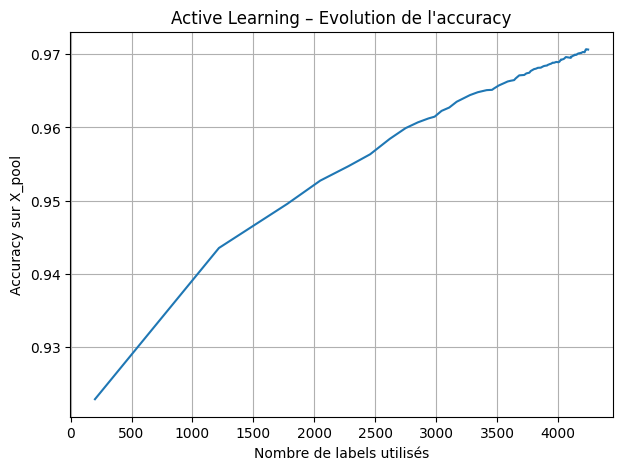

In [12]:
# ---- Final Results DataFrame ----
results_df = pd.DataFrame(results)

# ---- Plot ----
plt.figure(figsize=(7,5))
plt.plot(results_df["labels_used"], results_df["accuracy"])
plt.xlabel("Nombre de labels utilisés")
plt.ylabel("Accuracy sur X_pool")
plt.title("Active Learning – Evolution de l'accuracy")
plt.grid(True)
plt.show()